In [1]:
import torch
import torch.nn as nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt
import numpy as np

In [2]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

DEVICE

'cuda'

In [3]:
import requests
import zipfile
from pathlib import Path

data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
  print(f"{image_path} directory already exists... skipping download")
else: 
  print(f"{image_path} does not exist, creating one...")
  image_path.mkdir(parents=True, exist_ok=True)

# Download pizza, steak and suhsi data
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print("Downloading pizza, steak, suhsi data...")
  f.write(request.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
  print("Unzipping pizza, steak and sushi data...")
  zip_ref.extractall(image_path)


data\pizza_steak_sushi directory already exists... skipping download
Unzipping pizza, steak and sushi data...


In [4]:
import os
def walk_through_dir(dir_path):
  """Walks through dir_path returning its contents."""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [5]:
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(WindowsPath('data/pizza_steak_sushi/train'),
 WindowsPath('data/pizza_steak_sushi/test'))

In [6]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data\pizza_steak_sushi'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi\test'.
There are 0 directories and 25 images in 'data\pizza_steak_sushi\test\pizza'.
There are 0 directories and 19 images in 'data\pizza_steak_sushi\test\steak'.
There are 0 directories and 31 images in 'data\pizza_steak_sushi\test\sushi'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi\train'.
There are 0 directories and 78 images in 'data\pizza_steak_sushi\train\pizza'.
There are 0 directories and 75 images in 'data\pizza_steak_sushi\train\steak'.
There are 0 directories and 72 images in 'data\pizza_steak_sushi\train\sushi'.


Random image path: data\pizza_steak_sushi\train\sushi\3107839.jpg
Image class: sushi
Image height: 384
Image width: 512


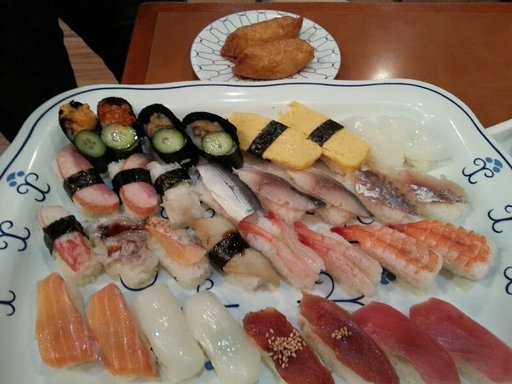

In [7]:
import random
from PIL import Image

image_path_list = list(image_path.rglob("*.*"))

image_path_list


random_image_path = random.choice(image_path_list)

image_class = random_image_path.parent.stem

img = Image.open(random_image_path)

print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img


(-0.5, 511.5, 383.5, -0.5)

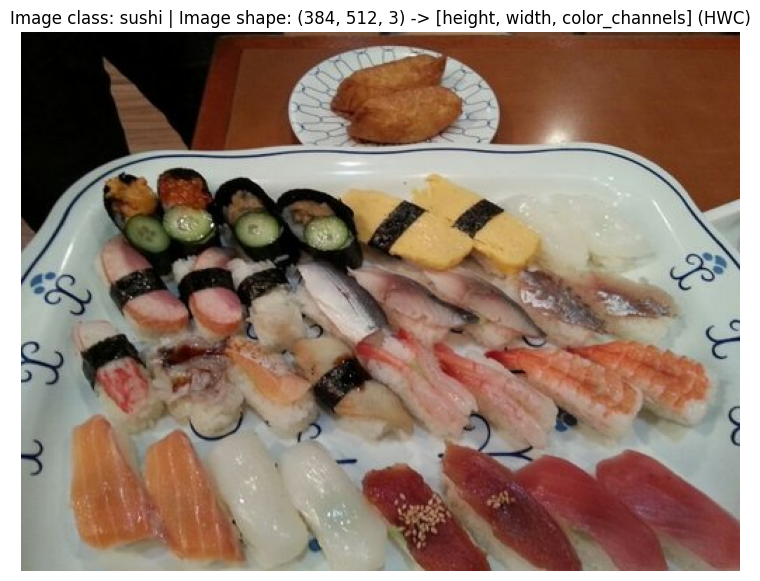

In [8]:
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels] (HWC)")
plt.axis(False)

In [9]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

data_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])


In [10]:
data_transform(img).shape

torch.Size([3, 64, 64])

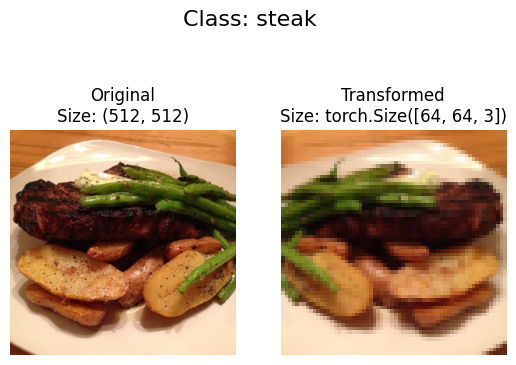

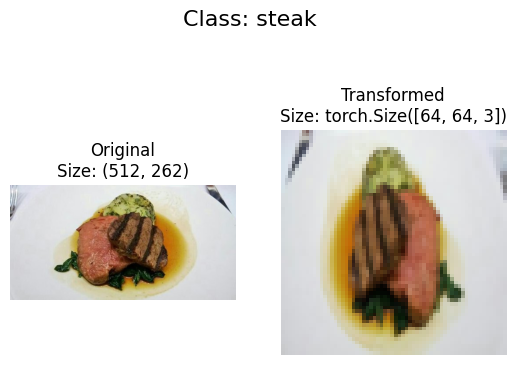

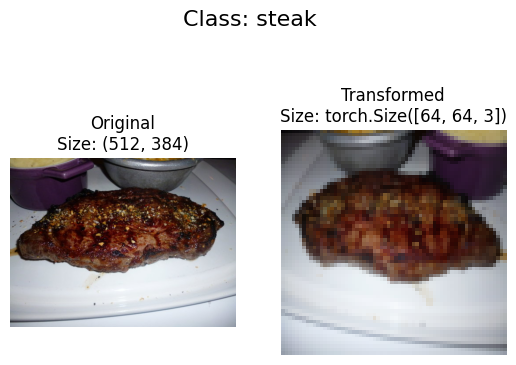

In [11]:
def plot_transformed_images(image_path: list, transform, n=3, seed=None):
    if seed:
        torch.random.seed(seed)
    random_image_paths = random.sample(image_path, k=n)
    for image_path in random_image_paths:
        #Original Image
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows=1, ncols=2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original\nSize: {f.size}")
            ax[0].axis(False)

        #Transformed Image
        transformed_image = transform(f).permute(1,2,0)
        ax[1].imshow(transformed_image)
        ax[1].set_title(f"Transformed\nSize: {transformed_image.shape}")
        ax[1].axis(False)

        fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)


plot_transformed_images(image_path=image_path_list,
                        transform=data_transform,
                        n=3,
                        seed=None)
        

In [12]:
from torchvision import datasets
train_dataset = datasets.ImageFolder(
    root=train_dir,
    transform=data_transform,
    target_transform=None
)

test_dataset = datasets.ImageFolder(root=test_dir, transform=data_transform)

train_dataset, test_dataset

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data\pizza_steak_sushi\train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data\pizza_steak_sushi\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [13]:
img, label = train_dataset[0][0], train_dataset[0][1]
print(f"Image tensor:\n {img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
 tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
         [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
         [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
         ...,
         [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
         [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
         [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
         [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
         [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
         ...,
         [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
         [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
         [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],

        [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
         [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
         [0.0196, 0.0157, 0.0157,  ..., 0.0

In [14]:
from torch.utils.data import Dataset

class ImageFolderCustomDataset(Dataset):
    def __init__(self, target_dir: str, transform = None):
        super().__init__()
        self.paths = list(Path(target_dir).rglob("*.jpg"))
        self.transform = transform
        self.classes, self.class_to_idx = self.find_classes(target_dir)
    
    def find_classes(self, directory: str) -> tuple[list[str], dict[str, int]]:
        classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())
        if not classes:
            raise FileNotFoundError(f"Could not find any class in {directory}")
        
        class_to_idx = {class_name: i for i, class_name in enumerate(classes)}
        return classes, class_to_idx
    
    def load_image(self, index: int) ->Image.Image:
        image_path = self.paths[index]
        return Image.open(image_path)
    
    def __len__(self) -> int:
        return len(self.paths)
    
    def __getitem__(self, index: int) -> tuple[torch.Tensor, int]:
        img = self.load_image(index)
        class_name = self.paths[index].parent.name
        class_idx = self.class_to_idx[class_name]

        if self.transform:
            img = self.transform(img)
        return img, class_idx

<h2>DATA AUGMENTATION (image transforms)</h2>

It is to add diversity to data
1. Rotate
2. Shift
3. Zoom
4. Trivial Augment (light dark etc)

In [15]:
train_transforms = transforms.Compose([transforms.Resize(size=(64, 64)),
                                      transforms.TrivialAugmentWide(num_magnitude_bins=31),
                                      transforms.ToTensor()])

test_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()])

In [16]:
train_data_customDataset = ImageFolderCustomDataset(target_dir=train_dir, transform=train_transforms)
test_data_customDataset = ImageFolderCustomDataset(target_dir=test_dir, transform=test_transform)

In [17]:
len(train_data_customDataset), len(test_data_customDataset)

(225, 75)

In [18]:
import torch.utils
import torch.utils.data


def display_random_images(dataset: torch.utils.data, classes: list[str]=None, n: int=10, display_shape: bool = True, seed: int=None):
     if n > 10:
        n = 10
        display_shape = False
        print(f"For display, purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.")

     if seed:
         random.seed(seed)
     
     random_samples_idx = random.sample(range(len(dataset)), k=n)

     plt.figure(figsize=(16, 8))

     for i, target_sample in enumerate(random_samples_idx):
         targ_image, targ_label = dataset[target_sample][0], dataset[target_sample][1]
    
         targ_image_adjust = targ_image.permute(1, 2, 0)


         plt.subplot(1, n, i+1)
         plt.imshow(targ_image_adjust)
         plt.axis("off")
         if classes:
             title = f"Class: {classes[targ_label]}"
         if display_shape:
             title = title + f"\nshape: {targ_image_adjust.shape}"
             plt.title(title)     


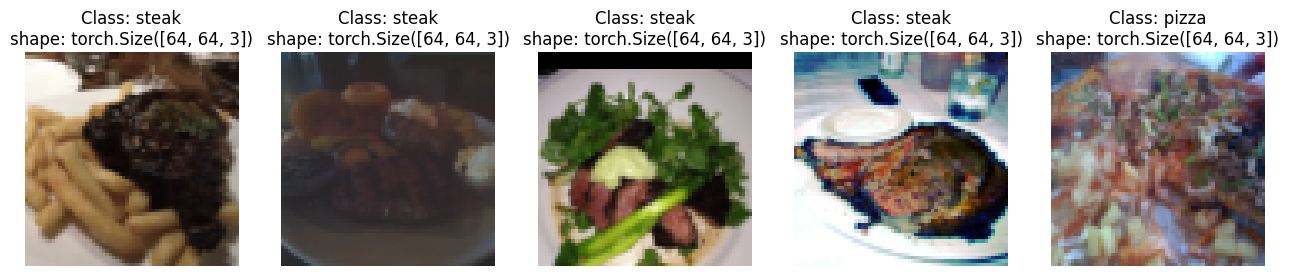

In [19]:
display_random_images(train_data_customDataset,
                      n=5, 
                      classes=train_data_customDataset.classes,
                      seed=None)

In [20]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data_customDataset, batch_size=BATCH_SIZE, shuffle=True)

test_dataloader = DataLoader(dataset=test_data_customDataset, batch_size=BATCH_SIZE, shuffle=False)

len(train_dataloader), len(test_dataloader)

(8, 3)

In [21]:
 class TinyVGG(nn.Module):
  """
  Model architecture copying TinyVGG from CNN Explainer: https://poloclub.github.io/cnn-explainer/
  """
  def __init__(self, 
               input_shape: int,
               hidden_units: int,
               output_shape: int) -> None:
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2) # default stride value is same as kernel_size
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2) # default stride value is same as kernel_size
    )
    self.classifier = nn.Sequential(
        nn.Flatten(), 
        nn.Linear(in_features=hidden_units*13*13, # to satify shape LECTURE 154
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    # print(x.shape)
    x = self.conv_block_2(x)
    # print(x.shape)
    x = self.classifier(x)
    # print(x.shape)
    return x

In [22]:
torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3, # number of color channels in our image data
                  hidden_units=10, 
                  output_shape=len(test_dataloader)).to(DEVICE)

model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [23]:
from torchinfo import summary

summary(model=model_0, input_size=[32, 3, 64, 64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [32, 3]                   --
├─Sequential: 1-1                        [32, 10, 30, 30]          --
│    └─Conv2d: 2-1                       [32, 10, 62, 62]          280
│    └─ReLU: 2-2                         [32, 10, 62, 62]          --
│    └─Conv2d: 2-3                       [32, 10, 60, 60]          910
│    └─ReLU: 2-4                         [32, 10, 60, 60]          --
│    └─MaxPool2d: 2-5                    [32, 10, 30, 30]          --
├─Sequential: 1-2                        [32, 10, 13, 13]          --
│    └─Conv2d: 2-6                       [32, 10, 28, 28]          910
│    └─ReLU: 2-7                         [32, 10, 28, 28]          --
│    └─Conv2d: 2-8                       [32, 10, 26, 26]          910
│    └─ReLU: 2-9                         [32, 10, 26, 26]          --
│    └─MaxPool2d: 2-10                   [32, 10, 13, 13]          --
├─Sequentia

In [24]:
from torchmetrics import Accuracy
accuracy = Accuracy(task="multiclass", num_classes=10).to(DEVICE)

def train_step(model: nn.Module, dataloader: torch.utils.data.DataLoader, loss_fn: torch.nn.Module, optimizer: torch.optim.Optimizer, device=DEVICE):
    
    model.train()
    train_accTorchMetric = 0
    train_loss = 0

    for batch, (X,y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        
        y_pred = model(X)

        loss = loss_fn(y_pred, y)
        train_accTorchMetric += accuracy(y_pred.argmax(dim=1), y)
        train_loss += loss.item()

        optimizer.zero_grad(set_to_none=True)

        loss.backward()

        optimizer.step()
    train_accTorchMetric /= len(dataloader)
    print (f"TrainAccuracy:: {train_accTorchMetric *100:.2f}%")
    return train_loss, train_accTorchMetric

def test_step(model: nn.Module, dataloader: torch.utils.data.DataLoader, loss_fn: torch.nn.Module, device=DEVICE):
    
    model.eval()
    test_accTorchMetric = 0
    test_loss = 0
    
    with torch.inference_mode():
        for batch, (X,y) in enumerate(dataloader):
            
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss = loss_fn(y_pred, y)
            test_loss += loss.item()
            test_accTorchMetric+= accuracy(y_pred.argmax(dim=1), y)

        test_accTorchMetric /= len(dataloader)
        print (f"TestAccuracy:: {test_accTorchMetric *100:.2f}%")
        return test_loss, test_accTorchMetric

        
        

 

In [25]:
loss_fn =  nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr = 0.001)


In [26]:
from tqdm.auto import tqdm



def train_model_epochs(model: nn.Module, train_dataloader: torch.utils.data.DataLoader, test_dataloader: torch.utils.data.DataLoader, loss_fn: nn.Module, optimizer: torch.optim.Optimizer, device=DEVICE, epochs: int=10) -> dict[str, list[float]]:
    results = {"train_loss": [],
               "train_accuracy": [],
               "test_loss": [],
               "test_accuracy": []}
    
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model, dataloader=train_dataloader, loss_fn=loss_fn, optimizer=optimizer, device=DEVICE)
        test_loss, test_acc = test_step(model=model, dataloader=test_dataloader, loss_fn=loss_fn, device=DEVICE)

        results["train_loss"].append(train_loss)
        results["train_accuracy"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_accuracy"].append(test_acc)
    return results


c:\Users\muhammad.sultan\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [27]:
from timeit import default_timer as timer

start_time = timer()

training_results = train_model_epochs(model=model_0, train_dataloader=train_dataloader, test_dataloader=test_dataloader, loss_fn=loss_fn, optimizer=optimizer, device=DEVICE, epochs=10)

end_time = timer()

print(f"StartTime={start_time:.3f} _____ EndTime={end_time:.3f} ____ TotalTimeTook={end_time-start_time:.3f}")

  0%|          | 0/10 [00:00<?, ?it/s]

TrainAccuracy:: 26.95%
TestAccuracy:: 54.17%


 10%|█         | 1/10 [00:00<00:08,  1.07it/s]

TrainAccuracy:: 29.30%
TestAccuracy:: 19.79%


 20%|██        | 2/10 [00:01<00:05,  1.40it/s]

TrainAccuracy:: 42.19%
TestAccuracy:: 26.04%


 30%|███       | 3/10 [00:02<00:04,  1.56it/s]

TrainAccuracy:: 42.58%
TestAccuracy:: 26.04%


 40%|████      | 4/10 [00:02<00:03,  1.65it/s]

TrainAccuracy:: 42.58%
TestAccuracy:: 26.04%


 50%|█████     | 5/10 [00:03<00:02,  1.72it/s]

TrainAccuracy:: 30.47%
TestAccuracy:: 26.04%


 60%|██████    | 6/10 [00:03<00:02,  1.72it/s]

TrainAccuracy:: 42.58%
TestAccuracy:: 26.04%


 70%|███████   | 7/10 [00:04<00:01,  1.68it/s]

TrainAccuracy:: 42.58%
TestAccuracy:: 26.04%


 80%|████████  | 8/10 [00:04<00:01,  1.68it/s]

TrainAccuracy:: 30.47%
TestAccuracy:: 26.04%


 90%|█████████ | 9/10 [00:05<00:00,  1.72it/s]

TrainAccuracy:: 30.47%
TestAccuracy:: 27.08%


100%|██████████| 10/10 [00:06<00:00,  1.66it/s]


StartTime=37478.951 _____ EndTime=37484.982 ____ TotalTimeTook=6.031


In [28]:
llm = training_results["test_loss"]
type(llm[0])

float

<class 'torch.Tensor'>


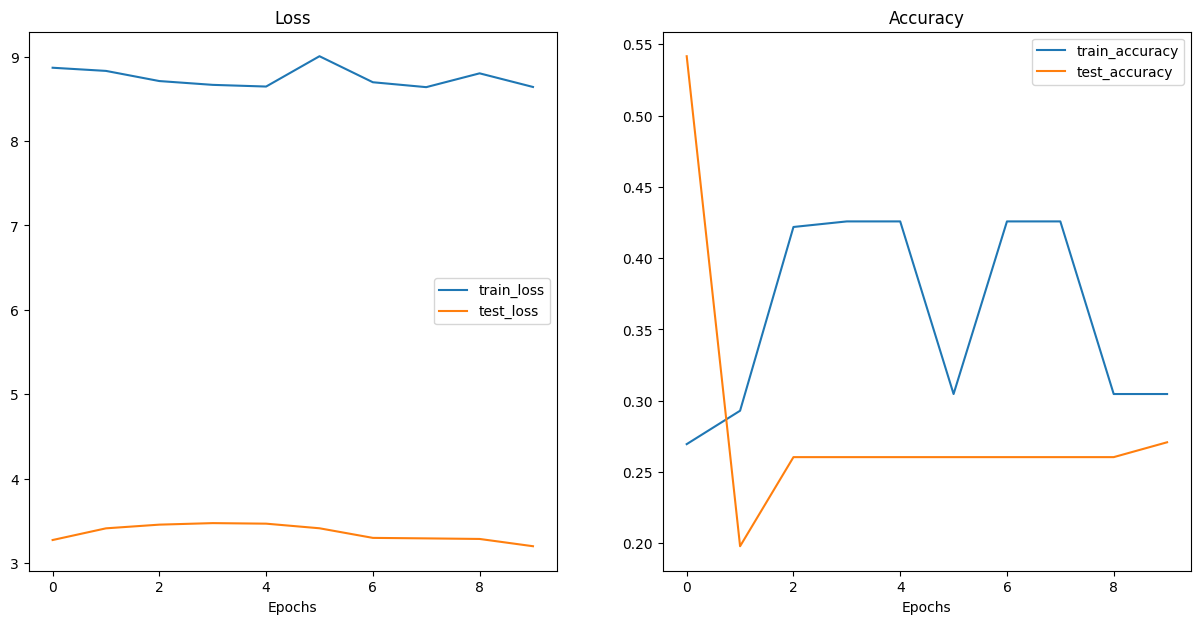

In [29]:
def plot_loss_curves(results: dict[str, list[float]]):
   
    train_loss = results["train_loss"]
    test_loss = results["test_loss"]

    train_accuracy = list(map(lambda x: x.cpu(), results["train_accuracy"]))
    test_accuracy = list(map(lambda x: x.cpu(), results["test_accuracy"]))

    print(type(test_accuracy[0]))

    epochs = range(len(results["train_loss"]))

    plt.figure(figsize=(15, 7))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_loss, label="train_loss")
    plt.plot(epochs, test_loss, label="test_loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracy, label="train_accuracy")
    plt.plot(epochs, test_accuracy, label="test_accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()

plot_loss_curves(results=training_results)
